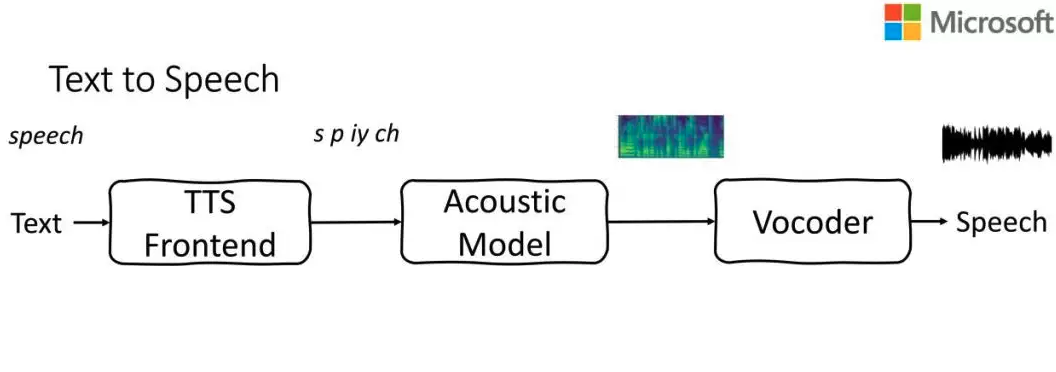

TTS系统的构成主要分为3个部分：TTS Frontend（TTS前端）、Acoustic Model（声学模型）、Vocoder（声码器）。

我们的TTS系统主要是基于近年来发展迅速的神经网络端到端的语音合成系统。这里没有涉及传统的参数法或者拼接法以及基于神经网络的参数法，因为学术界和工业界都在从传统的方法转到基于端到端的神经网络模型。最近学术界也有些更极端的做法，比如完全舍弃了TTS前端，直接把语音的文本作为输入，或者把声码器部分和声学模型部分集成在一起进行端到端的训练。这样的一些前沿的研究探索还没有在工业界得到广泛的应用，所以我们本次的分享，还是基于工业界和学术界广泛认可和接受的合成系统。

首先，**TTS前端的主要功能就是给定一个文本生产它的发音信息及语言学信息，声学模型基于上述的信息生成声学对应的特征，这里用的比较多的特征是梅尔频谱，然后声码器部分基于生成的声学特征作为条件信息来合成最后的语音波形图**。

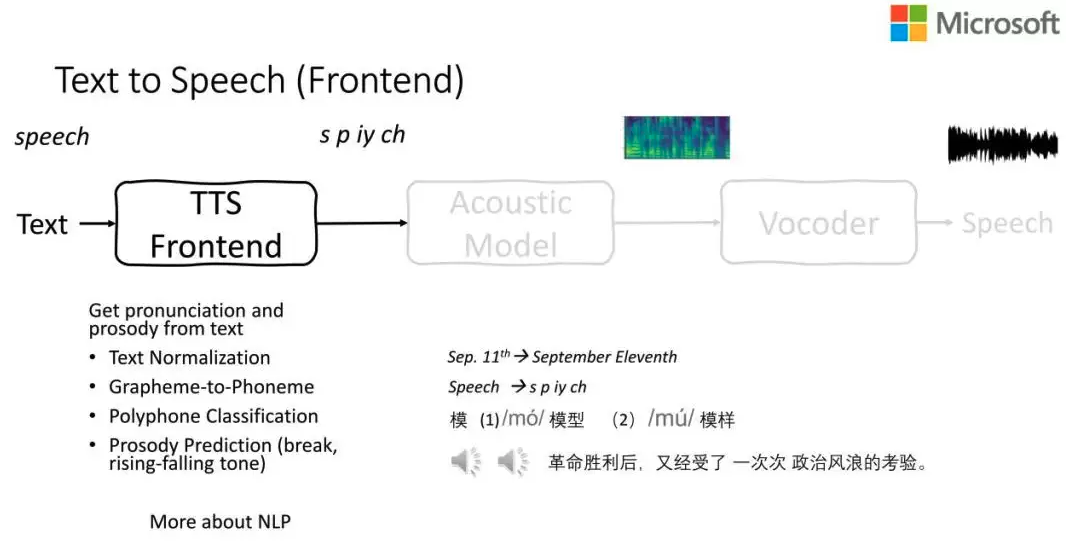

前端的主要功能是从文本信息产生发音和语言学的信息，其任务包括：

- Text Normalization（文本归一化）：在语音合成中常见的文字很多是简写或者缩写的，需要把这些文字标准化。如Sep.11th需要展成全写的September Eleventh，方便后面进行语言学分析。

- Grapheme-to-Phoneme（字形转音形）：比如speech是这个文本的字形，需要先把它转化成音素s p iy ch，也就是发音信息，方便后面的声学模型更准确的知道这个文本发什么样的音。

- Polyphone Classification（多音字分类）：很多语言中都有多音字的现象，比如模型和模样，这里的模字就发不同的音。所以在输入一个句子的时候，前端就需要准确判断出这个字的发音，否则后端的声学模型可能会发音不准。

- Prosody Prediction（break，rising-falling tone）：还有些任务是对韵律进行预测，包括句子中词与词之间的停顿或者句子整体的升降调信息。如：革命胜利后，又经受了一次次政治风浪的考验，如果停顿信息不准确就会出现：革命胜利后，又经受了 一次  次 政治风浪的考验，在一次次的地方有一个停顿，这是不该有的，会导致语音合成的信息不自然，如果再严重点可能会影响语音信息的传达。

这就是整个前端所涉及到的任务，更多的是涉及NLP的知识。

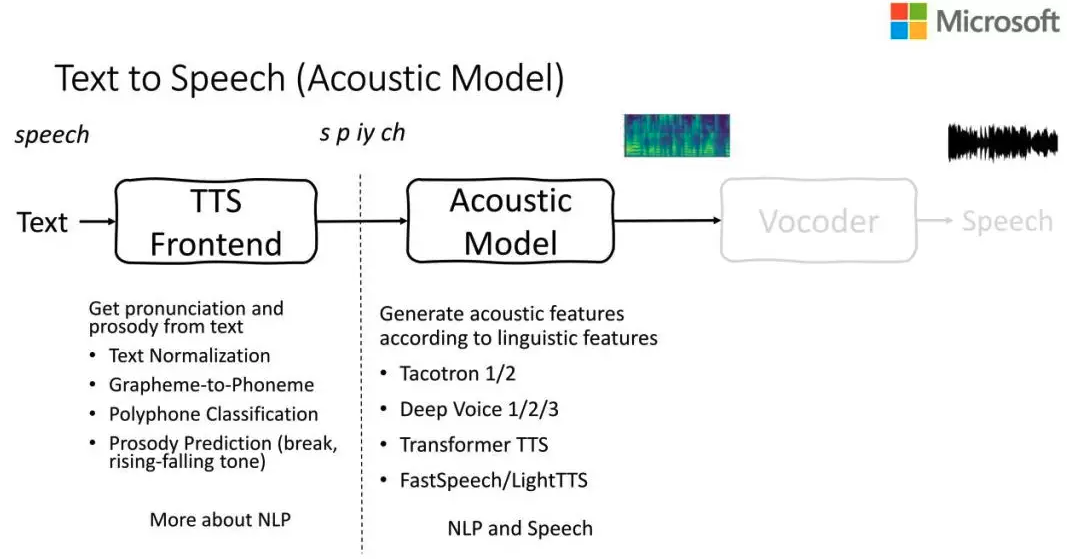

声学模型主要是基于前端产生的发音信息或者语言学信息来产生声学的特征，前端的信息其实是可以简化的，甚至不用前端的信息，可以直接用字符作为输入或者简单点用音素做为输入，或者更复杂的，我们可以设计出成百上千维的ID Feature来作为输入。输出的声学特征，目前TTS用的比较多的是梅尔频谱图。声学模型主要包括的模型有：

- Tacotron 1/2 
- Deep Voice 1/2/3
- Transfo